<a href="https://colab.research.google.com/github/ShakirJ25/QNC-Exercises/blob/main/Linear_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

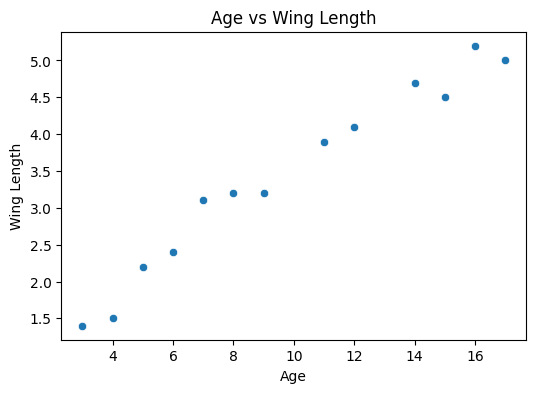

Slope: 0.26468412066021624
Intercept: 0.8296243597040405


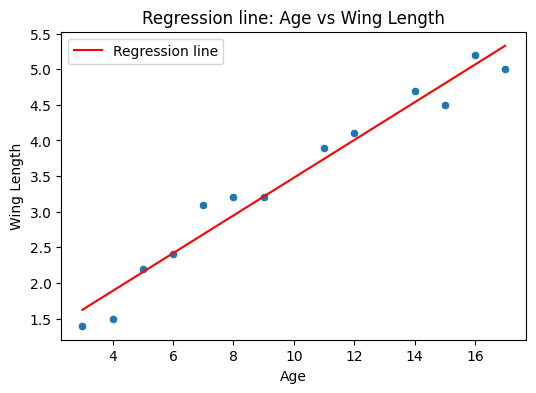

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           3.01e-09
Time:                        02:22:04   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

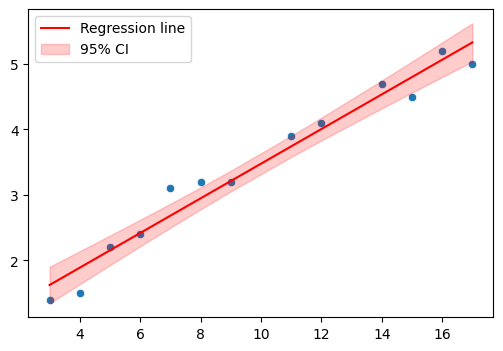

R-squared: 0.9633822518042857
Pearson r: 0.9815203776816283
p-value: 3.0097431724567387e-09


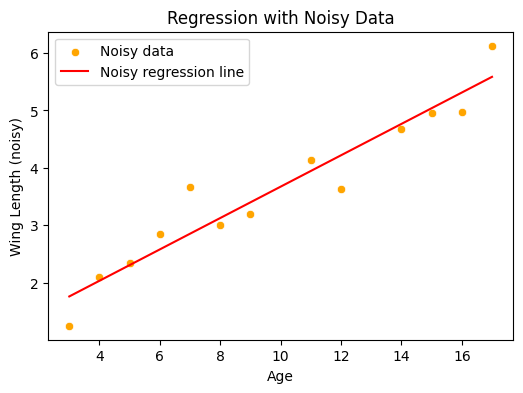

Noisy slope: 0.2735352116334457
Noisy intercept: 0.9364882349865811
Noisy R^2: 0.9161880966953759


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Data
age = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17])
wing = np.array([1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0])

# 1. Plot relationship
plt.figure(figsize=(6,4))
sns.scatterplot(x=age, y=wing)
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Age vs Wing Length")
plt.show()

# 2. Regression line
X = sm.add_constant(age)  # add intercept
model = sm.OLS(wing, X).fit()
intercept, slope = model.params

print("Slope:", slope)
print("Intercept:", intercept)

plt.figure(figsize=(6,4))
sns.scatterplot(x=age, y=wing)
plt.plot(age, intercept + slope*age, color="red", label="Regression line")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression line: Age vs Wing Length")
plt.legend()
plt.show()

# 3. Hypothesis test H0: b=0
print(model.summary())  # contains t-test for slope

# conf_int is an ndarray (n_params x 2). intercept is index 0, slope is index 1
conf_int = model.conf_int()        # ndarray
slope_conf_int = conf_int[1]       # [lower, upper]
print("95% CI for slope:", slope_conf_int)


# Plot with confidence interval
pred = model.get_prediction(X)
pred_ci = pred.conf_int()
plt.figure(figsize=(6,4))
sns.scatterplot(x=age, y=wing)
plt.plot(age, intercept + slope*age, color="red", label="Regression line")
plt.fill_between(age, pred_ci[:,0], pred_ci[:,1], color="red", alpha=0.2, label="95% CI")
plt.legend()
plt.show()

# 5. R^2
print("R-squared:", model.rsquared)

# 6. Pearson correlation
r, pval = stats.pearsonr(age, wing)
print("Pearson r:", r)
print("p-value:", pval)

# 7. Add noise and re-fit regression
noise = np.random.normal(0, 0.5, size=len(wing))
wing_noisy = wing + noise

X_noisy = sm.add_constant(age)
model_noisy = sm.OLS(wing_noisy, X_noisy).fit()
intercept_n, slope_n = model_noisy.params

plt.figure(figsize=(6,4))
sns.scatterplot(x=age, y=wing_noisy, color="orange", label="Noisy data")
plt.plot(age, intercept_n + slope_n*age, color="red", label="Noisy regression line")
plt.xlabel("Age")
plt.ylabel("Wing Length (noisy)")
plt.title("Regression with Noisy Data")
plt.legend()
plt.show()

print("Noisy slope:", slope_n)
print("Noisy intercept:", intercept_n)
print("Noisy R^2:", model_noisy.rsquared)